# Gauss‚ÄìNewton approach / Newton‚ÄìRaphson approach to minimize the sum of squared errors between model predictions and observed counts

In [1]:
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import misc
from sympy import *
from tabulate import tabulate
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
import seaborn as sns
from numpy import linalg as LA
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
from tabulate import tabulate as tabulate
from scipy.stats import norm
from scipy.optimize import fmin
from scipy.stats import *

# 1. Problem 2.6 on page 56 of the Computation Statistics book.

2.6. Table 2.3 provides counts of a Ô¨Çour beetle (Tribolium confusum) population at various points in time [103]. Beetles in all stages of development were counted, and the food supply was carefully controlled. An elementary model for population growth is the logistic model given by

\begin{equation*}
\frac{dN}{dt}=r N(1-\frac{N}{K})
\end{equation*} 

where $N$ ispopulationsize, $t$ is time, $r$ isagrowthrateparameter,and $K$ isaparameter that represents the population carrying capacity of the environment. The solution to this differential equation is given by

\begin{equation*}
N_t=f(t)=\frac{K N_0}{N_0+(K-N)exp(-rt)}
\end{equation*} 

where $N_t$ denotes the population size at time $t$. 

## a. Fit the logistic growth model to the Ô¨Çour beetle data using the Gauss‚ÄìNewton approach to minimize the sum of squared errors between model predictions and observed counts. 

Table 2.3 is:

In [2]:
df = {'Days':[0,8,28,41,63,79,97,117,135,154],
        'Beetles':[2,47,192,256,768,896,1120,896,1184,1024]}
Data = pd.DataFrame(df)
Data

Days  Beetles
0     0        2
1     8       47
2    28      192
3    41      256
4    63      768
5    79      896
6    97     1120
7   117      896
8   135     1184
9   154     1024

We can plot the points:

Text(0.5, 1.0, 'Counts of flour beetles in all stages of development over 154 days')

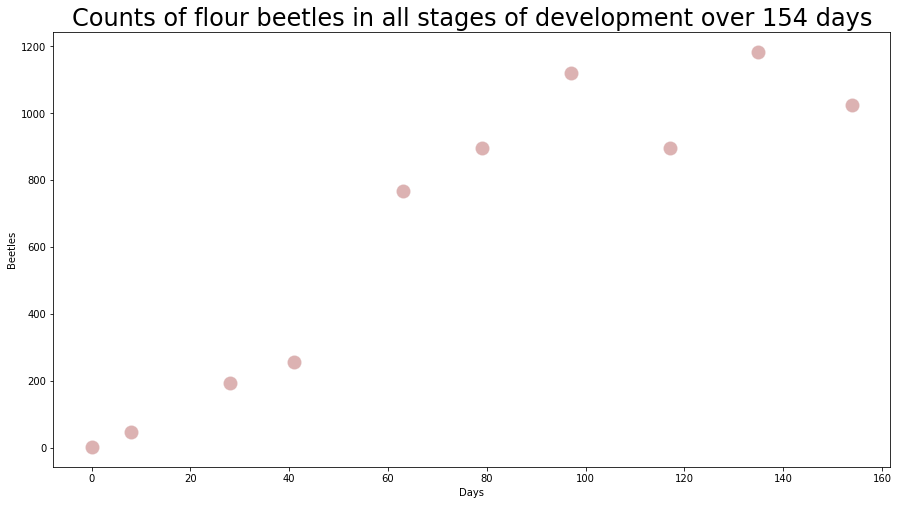

In [3]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=Data,x='Days',y='Beetles',color="darkred",alpha=0.3,s=200)
plt.title("Counts of flour beetles in all stages of development over 154 days",fontsize=24)

we need to have first and second derivative respect to $K$, $r$:

In [4]:
t = Symbol('t')
K = Symbol('K')
r = Symbol('r')
f = (K*2)/(2+(K-2)*sym.exp(-r*t))
ft=lambdify([t,K,r], f, 'numpy')

According to Table 2.3, $N_0$ is 2. Therefore, 

The first derivative respect to $K$ is:

In [5]:
f_prime_K = f.diff(K)
f_prime_K

-2*K*exp(-r*t)/((K - 2)*exp(-r*t) + 2)**2 + 2/((K - 2)*exp(-r*t) + 2)

The second derivative respect to $K$ is:

In [6]:
f_doubleprime_K=f_prime_K.diff(K)
f_doubleprime_K

4*K*exp(-2*r*t)/((K - 2)*exp(-r*t) + 2)**3 - 4*exp(-r*t)/((K - 2)*exp(-r*t) + 2)**2

The first derivative respect to $r$ is:

In [7]:
f_prime_r = f.diff(r)
f_prime_r

2*K*t*(K - 2)*exp(-r*t)/((K - 2)*exp(-r*t) + 2)**2

The second derivative respect to $r$ is:

In [8]:
f_doubleprime_r=f_prime_r.diff(r)
f_doubleprime_r

4*K*t**2*(K - 2)**2*exp(-2*r*t)/((K - 2)*exp(-r*t) + 2)**3 - 2*K*t**2*(K - 2)*exp(-r*t)/((K - 2)*exp(-r*t) + 2)**2

The second derivative respect to  $ùëü$  and $K$ is:

In [9]:
f_doubleprime_Kr=f_prime_K.diff(r)
f_doubleprime_Kr

-4*K*t*(K - 2)*exp(-2*r*t)/((K - 2)*exp(-r*t) + 2)**3 + 2*K*t*exp(-r*t)/((K - 2)*exp(-r*t) + 2)**2 + 2*t*(K - 2)*exp(-r*t)/((K - 2)*exp(-r*t) + 2)**2

In [10]:
def func(t):
    K = Symbol('K')
    r = Symbol('r')
    function=zeros(len(t),1)
    for i in range(0,len(t)):
        function[i] = (K*2)/(2+(K-2)*sym.exp(-r*t[i]))
    return function
f=func(Data['Days'])
K = Symbol('K')
r = Symbol('r')
ft=lambdify([K,r], f, 'numpy')

In [11]:
def difffunc(t):
    K = Symbol('K')
    r = Symbol('r')
    difffunction=zeros(len(t),1)
    for i in range(0,len(t)):
        difffunction[i] = (K*2*r*(K-2)*sym.exp(-r*t[i]))/(2+(K-2)*sym.exp(-r*t[i]))**2
    return difffunction
difff=difffunc(Data['Days'])
K = Symbol('K')
r = Symbol('r')
ft_prime=lambdify([K,r], difff, 'numpy')

In [12]:
def difffunc_k(t):
    K = Symbol('K')
    r = Symbol('r')
    difffunctionk=zeros(len(t),1)
    for i in range(0,len(t)):
        difffunctionk[i] = ((-K*2*sym.exp(-r*t[i]))/((2+(K-2)*sym.exp(-r*t[i]))**2))+(2/(2+(K-2)*sym.exp(-r*t[i])))
    return difffunctionk
difff_k=difffunc_k(Data['Days'])
K = Symbol('K')
r = Symbol('r')
ft_prime_k=lambdify([K,r], difff_k, 'numpy')

In [13]:
def difffunc_r(t):
    K = Symbol('K')
    r = Symbol('r')
    difffunctionr=zeros(len(t),1)
    for i in range(0,len(t)):
        difffunctionr[i] = (K*2*t[i]*(K-2)*sym.exp(-r*t[i]))/((2+(K-2)*sym.exp(-r*t[i]))**2)
    return difffunctionr
difff_r=difffunc_r(Data['Days'])
K = Symbol('K')
r = Symbol('r')
ft_prime_r=lambdify([K,r], difff_r, 'numpy')

In [14]:
A=np.column_stack((ft_prime_k(100,5), ft_prime_r(100,5)))
A.T
inv(A.T.dot(A))

array([[ 1.25000000e-01, -7.50590774e+11],
       [-7.50590774e+11,  4.05638288e+25]])

In [15]:
def Gauss_Newton(y,K_init,r_init,e,maxiter):
    K=K_init
    r=r_init
    residual=sum((y-ft(K,r))**2)
    Result = pd.DataFrame(columns=['K', 'r','Residual','SE_K','SE_r','Correlation'])
    Result.loc[0] = [K, r,residual,'nan','nan','nan']
    itr=0
    j=1
    

    while (residual[0]>e):
        x=y-ft(K,r)
        A=np.column_stack((ft_prime_k(K,r), ft_prime_r(K,r)))        
        [[K],[r]]=[[K],[r]]+inv(A.T.dot(A)).dot(A.T).dot(x)
        residual_new=sum((y-ft(K,r))**2)
        residual=residual_new
        s=residual[0]/(len(y)-2)
        cov=inv(A.T.dot(A))
        corr=cov[0][1]/(np.sqrt(cov[0][0])*np.sqrt(cov[1][1]))
        se=np.sqrt(s)*np.sqrt(inv(A.T.dot(A)).diagonal())
        print(tabulate([[itr, np.array([[K],[r]]),residual,se[0],se[1],corr]], headers=['iteration', 'K and r','Error','SE_K','SE_r','Correlation'], tablefmt='orgtbl'))

        Result.loc[j] = [K, r,residual[0],se[0],se[1],corr]
        
        #print(np.array(residual))
        #print(sqrt(s)*sqrt(inv(A.T.dot(A)).diagonal()))
        #print(np.sqrt(inv(A.T.dot(A)).diagonal()))
        
        
        #print('corr',cov[0][1]/(np.sqrt(cov[0][0])*np.sqrt(cov[1][1])))
        #print('se',se)
        

        itr+=1
        j+=1
        if itr==maxiter:
            break
    print ('The optimum is at: K=', K,'r=',r)
    print ('number of iteration is: ', itr)
    return Result, K, r


In [16]:
result,K,r=Gauss_Newton(Data[['Beetles']],200,0.5,0.001,1000)

|   iteration | K and r            |   Error |    SE_K |     SE_r |   Correlation |
|-------------+--------------------+---------+---------+----------+---------------|
|           0 | [[7.92053944e+02]  |  694134 | 104.148 | 0.804343 |     -0.044258 |
|             |  [2.31881269e-01]] |         |         |          |               |
|   iteration | K and r            |   Error |    SE_K |      SE_r |   Correlation |
|-------------+--------------------+---------+---------+-----------+---------------|
|           1 | [[9.02420443e+02]  |  191507 | 59.5852 | 0.0299915 |     -0.206449 |
|             |  [1.47186348e-01]] |         |         |           |               |
|   iteration | K and r            |   Error |    SE_K |      SE_r |   Correlation |
|-------------+--------------------+---------+---------+-----------+---------------|
|           2 | [[1.00065034e+03]  | 91162.8 | 44.8138 | 0.0110106 |     -0.188656 |
|             |  [1.25873347e-01]] |         |         |           | 

The final $k$ and $r$ are:

In [17]:
print ('The optimum is at: K=', K,'r=',r)

The optimum is at: K= 1033.5153256382757 r= 0.11795855719560162


The last 5 iterations for Gauss_Newton method is:

In [18]:
result.tail(5)

K         r Residual     SE_K        SE_r Correlation
996   1033.52  0.117959  83240.5  47.8238  0.00777512   -0.342842
997   1033.52  0.117959  83240.5  47.8238  0.00777512   -0.342842
998   1033.52  0.117959  83240.5  47.8238  0.00777512   -0.342842
999   1033.52  0.117959  83240.5  47.8238  0.00777512   -0.342842
1000  1033.52  0.117959  83240.5  47.8238  0.00777512   -0.342842

Now, we can plot the Ô¨Åtted model together with the observed data in a single plot.

In [19]:
t_plot=linspace(0,160,1000)
f_plot=func(t_plot)
K = Symbol('K')
r = Symbol('r')
ft_plot=lambdify([K,r], f_plot, 'numpy')
y1=ft_plot(1033.515326,0.117959)

Text(0, 0.5, 'Beetles')

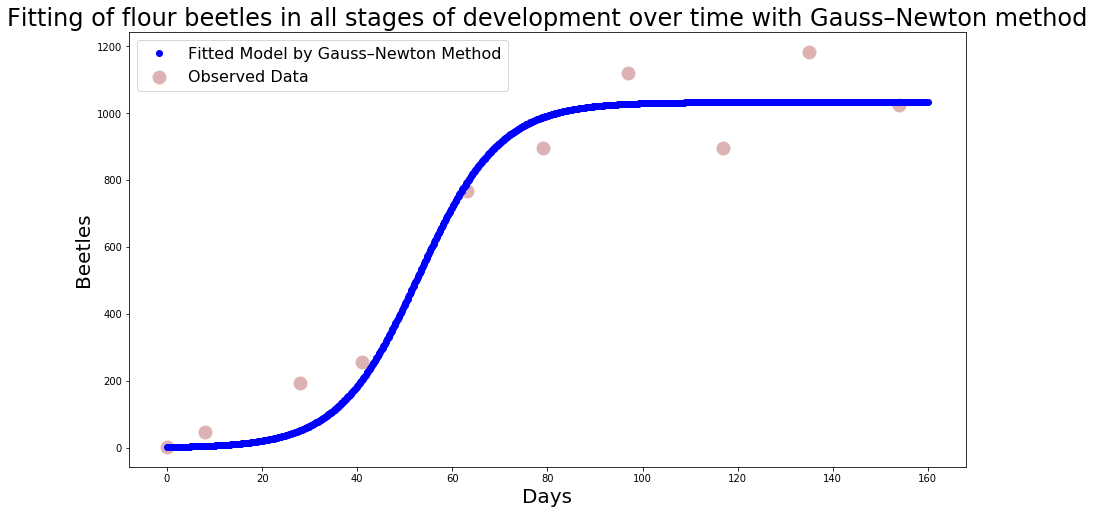

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=Data,x='Days',y='Beetles',color="darkred",alpha=0.3,s=200)
plt.title("Fitting of flour beetles in all stages of development over time with Gauss‚ÄìNewton method",fontsize=24)
plt.plot(t_plot, y1, 'bo')
plt.legend(("Fitted Model by Gauss‚ÄìNewton Method", "Observed Data"),fontsize=16)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Beetles',fontsize=20)

## b. Fit the logistic growth model to the Ô¨Çour beetle data using the Newton‚ÄìRaphson approach to minimize the sum of squared errors between model predictions and observed counts. 

In [21]:
def doubledifffunc_k(t):
    K = Symbol('K')
    r = Symbol('r')
    doubledifffunctionk=zeros(len(t),1)
    for i in range(0,len(t)):
        doubledifffunctionk[i] = (K*4*sym.exp(-2*r*t[i]))/(((K-2)*sym.exp(-r*t[i])+2)**3)-(4*sym.exp(-r*t[i]))/(((K-2)*sym.exp(-r*t[i]))+2)**2
    return doubledifffunctionk
doubledifff_k=doubledifffunc_k(Data['Days'])
K = Symbol('K')
r = Symbol('r')
ft_doubleprime_k=lambdify([K,r], doubledifff_k, 'numpy')

In [22]:
t = Symbol('t')
K = Symbol('K')
r = Symbol('r')
f = (K*2)/(2+(K-2)*sym.exp(-r*t))
ft=lambdify([t,K,r], f, 'numpy')

In [23]:
f_prime_r = f.diff(r)
f_doubleprime_r=f_prime_r.diff(r)
f_firstder_r=lambdify([t,K,r], f_prime_r, 'numpy')
f_secder_r=lambdify([t,K,r], f_doubleprime_r, 'numpy')

In [24]:
f_prime_r

2*K*t*(K - 2)*exp(-r*t)/((K - 2)*exp(-r*t) + 2)**2

In [25]:
f_prime_K = f.diff(K)
f_doubleprime_K=f_prime_K.diff(K)
f_firstder_K=lambdify([t,K,r], f_prime_K, 'numpy')
f_secder_K=lambdify([t,K,r], f_doubleprime_K, 'numpy')

In [26]:
f_doubleprime_Kr=f_prime_K.diff(r)
f_secder_Kr=lambdify([t,K,r], f_doubleprime_Kr, 'numpy')

In [27]:
def g(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=(y[i]-ft(t[i],K,r))**2
    return g

In [28]:
def gprime_r(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-ft(t[i],K,r))*f_firstder_r(t[i],K,r)
    return g    

In [29]:
def gprime_K(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-ft(t[i],K,r))*f_firstder_K(t[i],K,r)
    return g    

In [30]:
def gdoubleprime_r(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-ft(t[i],K,r))*f_secder_r(t[i],K,r)+2*((f_firstder_r(t[i],K,r))**2)
    return g    

In [31]:
def gdoubleprime_K(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-ft(t[i],K,r))*f_secder_K(t[i],K,r)+2*((f_firstder_K(t[i],K,r))**2)
    return g    

In [32]:
def gdoubleprime_Kr(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-ft(t[i],K,r))*f_secder_Kr(t[i],K,r)+2*f_firstder_K(t[i],K,r)*f_firstder_r(t[i],K,r)
    return g    

In [33]:
def Newton_Rapson(y,t,K_init,r_init,e,maxiter):
    itr=0
    j=2
    K=K_init
    r=r_init
    residual=g(y,t,K,r)
    Result = pd.DataFrame(columns=['K', 'r','Residual','Hessian first col.','Hessian second col.','SE_K','SE_r','Correlation'])
    Result.loc[0] = [K, r,residual, gdoubleprime_K(y,t,K,r),gdoubleprime_Kr(y,t,K,r),'nan','nan','nan']
    Result.loc[1] = ['nan', 'nan','nan', gdoubleprime_Kr(y,t,K,r),gdoubleprime_r(y,t,K,r),'nan','nan','nan']
    
    hessian_matrix=[[gdoubleprime_K(y,t,K,r),gdoubleprime_Kr(y,t,K,r)],[gdoubleprime_Kr(y,t,K,r),gdoubleprime_r(y,t,K,r)]]

    while (residual>e):
        delta=[[gprime_K(y,t,K,r)],[gprime_r(y,t,K,r)]]

        [[K],[r]] = [[K],[r]] - inv(hessian_matrix).dot(delta)
        hessian_matrix=[[gdoubleprime_K(y,t,K,r),gdoubleprime_Kr(y,t,K,r)],[gdoubleprime_Kr(y,t,K,r),gdoubleprime_r(y,t,K,r)]]
        #I=-1*hessian_matrix
        #cov=inv(I)
        cov=(inv(hessian_matrix))
        corr=cov[0][1]/(np.sqrt(cov[0][0])*np.sqrt(cov[1][1]))
        seK=np.sqrt(cov[0][0])
        ser=np.sqrt(cov[1][1])
        #print('corr',cov[0][1]/(np.sqrt(cov[0][0])*np.sqrt(cov[1][1])))
        #print('seK',np.sqrt(cov[0][0]))
        #print('ser',np.sqrt(cov[1][1]))
        residual_new=g(y,t,K,r)
        residual=residual_new
        print(tabulate([[itr, np.array([[K],[r]]), np.array(hessian_matrix),seK,ser,corr]], headers=['iteration', 'K and r','Hessian Matrix','SE_K','SE_r','Correlation'], tablefmt='orgtbl'))
        Result.loc[j] = [K, r,residual, gdoubleprime_K(y,t,K,r),gdoubleprime_Kr(y,t,K,r),seK,ser,corr]
        Result.loc[j+1] = ['nan', 'nan','nan',  gdoubleprime_Kr(y,t,K,r),gdoubleprime_r(y,t,K,r),'nan','nan','nan']

        itr+=1
        j+=2
        if itr==maxiter:
            break
    print ('The optimum is at: K=', K,'r=',r)
    print ('number of iteration is: ', itr)
    return Result,K,r

In [34]:
result_NR,K_NR,r_NR=Newton_Rapson(Data['Beetles'],Data['Days'],200,0.5,0.001,1000)

|   iteration | K and r            | Hessian Matrix                    |     SE_K |        SE_r |   Correlation |
|-------------+--------------------+-----------------------------------+----------+-------------+---------------|
|           0 | [[7.95377545e+02]  | [[1.17130135e+01 1.06403977e+04]  | 0.302053 | 8.42724e-05 |      -0.25345 |
|             |  [1.45656031e-01]] |  [1.06403977e+04 1.50474490e+08]] |          |             |               |
|   iteration | K and r            | Hessian Matrix                    |    SE_K |       SE_r |   Correlation |
|-------------+--------------------+-----------------------------------+---------+------------+---------------|
|           1 | [[1.01029588e+03]  | [[1.03848816e+01 2.16719749e+04]  | 0.33787 | 6.4043e-05 |     -0.395566 |
|             |  [1.18887738e-01]] |  [2.16719749e+04 2.89039405e+08]] |         |            |               |
|   iteration | K and r            | Hessian Matrix                    |     SE_K |        SE_r 

The final $k$ and $r$ are:

In [35]:
print ('The optimum is at: K=', K_NR,'r=',r_NR)

The optimum is at: K= 1033.5153256382757 r= 0.11795855719560162


The last 5 iterations for Gauss_Newton method is:

In [36]:
result_NR.tail(10)

K         r Residual  Hessian first col.  Hessian second col.  \
1992  1033.52  0.117959  83240.5           10.293105         2.326315e+04   
1993      nan       nan      nan        23263.148090         3.065581e+08   
1994  1033.52  0.117959  83240.5           10.293105         2.326315e+04   
1995      nan       nan      nan        23263.148090         3.065581e+08   
1996  1033.52  0.117959  83240.5           10.293105         2.326315e+04   
1997      nan       nan      nan        23263.148090         3.065581e+08   
1998  1033.52  0.117959  83240.5           10.293105         2.326315e+04   
1999      nan       nan      nan        23263.148090         3.065581e+08   
2000  1033.52  0.117959  83240.5           10.293105         2.326315e+04   
2001      nan       nan      nan        23263.148090         3.065581e+08   

          SE_K         SE_r Correlation  
1992  0.342438  6.27478e-05   -0.414132  
1993       nan          nan         nan  
1994  0.342438  6.27478e-05   -0.414132  
1995       nan          nan         nan  
1996  0.342438  6.27478e-05   -0.414132  
1997       nan          nan         nan  
1998  0.342438  6.27478e-05   -0.414132  
1999       nan          nan         nan  
2000  0.342438  6.27478e-05   -0.414132  
2001       nan          nan         nan

Now, we can plot the Ô¨Åtted model together with the observed data in a single plot.

Text(0, 0.5, 'Beetles')

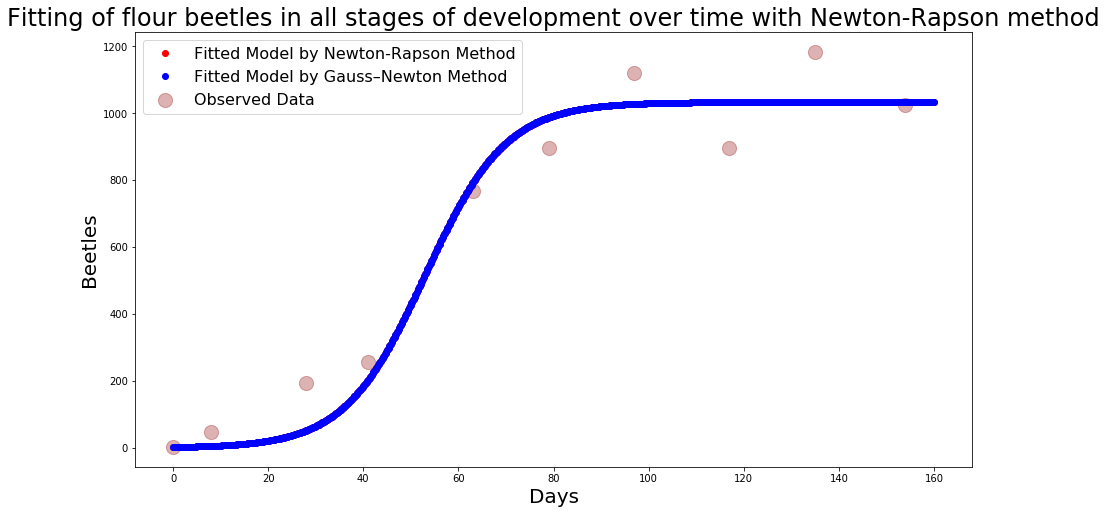

In [37]:
plt.figure(figsize=(15,8))
plt.scatter(data=Data,x='Days',y='Beetles',color="darkred",alpha=0.3,s=200)
plt.title("Fitting of flour beetles in all stages of development over time with Newton-Rapson method",fontsize=24)
plt.plot(t_plot, ft(t_plot,1033.5153256382757, 0.11795855719560162), 'ro')
plt.plot(t_plot, y1, 'bo')
plt.legend(("Fitted Model by Newton-Rapson Method", "Fitted Model by Gauss‚ÄìNewton Method","Observed Data"),fontsize=16)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Beetles',fontsize=20)

As we can see in the above graph, the fitted model by Newton-Rapson and Gauss-Newton are completely same. 

## c. In many population modeling applications, an assumption of lognormality is adopted. The simplest assumption would be that the $logNt$ are independent and normally distributed with mean $logf(t)$ and variance $\sigma^2$. Find the MLEs under thisassumption,using both the Gauss‚ÄìNewton and the Newton‚ÄìRaphson methods. Provide standard errors for your parameter estimates, and an estimate of the correlation between them. Comment. 

\begin{equation*}
log N_t \sim N(log f(t), \sigma^2) 
\end{equation*}

\begin{equation*}
log f(t) = log K +log N_0 - log[N_0+(K-N_0) e^{-rt}] 
\end{equation*}

\begin{equation*}
y_t= log N_t  
\end{equation*}

\begin{equation*}
L(K,r)= \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}}\exp(-\frac{[y_{t_{i}}-log f(t_i)]^2}{2\sigma^2})
\end{equation*}

\begin{equation*}
l(K,r)=log L(k,r)=\sum_{i = 1}^{n} log(\frac{1}{\sqrt{2 \pi \sigma^2}}) - \frac{1}{2\sigma^2}\sum_{i = 1}^{n} [y_{t_{i}}-log f(t_i)]^2
\end{equation*}

l is a function of K and r. To find the maximum lokelihood, we need to minimize the $\sum_{i = 1}^{n} [y_{t_{i}}-log f(t_i)]^2$

In [38]:
Data['log(N_t)']=np.log(Data['Beetles'])
Data

Days  Beetles  log(N_t)
0     0        2  0.693147
1     8       47  3.850148
2    28      192  5.257495
3    41      256  5.545177
4    63      768  6.643790
5    79      896  6.797940
6    97     1120  7.021084
7   117      896  6.797940
8   135     1184  7.076654
9   154     1024  6.931472

## Gauss-Newton

In [39]:
def func(t):
    K = Symbol('K')
    r = Symbol('r')
    function=zeros(len(t),1)
    for i in range(0,len(t)):
        function[i] = log(K)+log(2)-log(2+(K-2)*sym.exp(-r*t[i]))
    return function
f=func(Data['Days'])
K = Symbol('K')
r = Symbol('r')
ft=lambdify([K,r], f, 'numpy')

In [40]:
def difffunc_k(t):
    K = Symbol('K')
    r = Symbol('r')
    difffunctionk=zeros(len(t),1)
    for i in range(0,len(t)):
        difffunctionk[i] = -(exp(-r*t[i])/((K-2)*exp(-r*t[i])+2))+1/K
    return difffunctionk
difff_k=difffunc_k(Data['Days'])
K = Symbol('K')
r = Symbol('r')
ft_prime_k=lambdify([K,r], difff_k, 'numpy')

In [41]:
def difffunc_r(t):
    K = Symbol('K')
    r = Symbol('r')
    difffunctionr=zeros(len(t),1)
    for i in range(0,len(t)):
        difffunctionr[i] = t[i]*(K-2)*exp(-r*t[i])/((K-2)*sym.exp(-r*t[i])+2)
    return difffunctionr
difff_r=difffunc_r(Data['Days'])
K = Symbol('K')
r = Symbol('r')
ft_prime_r=lambdify([K,r], difff_r, 'numpy')

In [42]:
A=np.column_stack((ft_prime_k(100,5), ft_prime_r(100,5)))
A.T
inv(A.T.dot(A))

array([[ 1.25000000e+03, -7.50590774e+15],
       [-7.50590774e+15,  4.05638288e+29]])

In [43]:
result_GNlog,K_GNlog,r_GNlog=Gauss_Newton(Data[['log(N_t)']],1000,0.5,0.001,1000)

|   iteration | K and r            |   Error |    SE_K |      SE_r |   Correlation |
|-------------+--------------------+---------+---------+-----------+---------------|
|           0 | [[6.01451636e+02]  | 3.53085 | 234.899 | 0.0921852 |    -0.0347821 |
|             |  [4.02288386e-01]] |         |         |           |               |
|   iteration | K and r            |   Error |    SE_K |      SE_r |   Correlation |
|-------------+--------------------+---------+---------+-----------+---------------|
|           1 | [[6.68167222e+02]  | 3.43271 | 139.381 | 0.0887409 |    -0.0312718 |
|             |  [4.00798949e-01]] |         |         |           |               |
|   iteration | K and r            |   Error |    SE_K |      SE_r |   Correlation |
|-------------+--------------------+---------+---------+-----------+---------------|
|           2 | [[6.72070895e+02]  | 3.43244 | 154.848 | 0.0879726 |    -0.0293295 |
|             |  [4.00502373e-01]] |         |         |         

The final $k$ and $r$ are:

In [44]:
print ('The optimum is at: K=', K_GNlog,'r=',r_GNlog)

The optimum is at: K= 672.0907891427541 r= 0.40046090005088


The last 5 iterations for Gauss_Newton method is:

In [45]:
result_GNlog.tail(5)

K         r Residual     SE_K       SE_r Correlation
996   672.091  0.400461  3.43244  155.759  0.0879202  -0.0292281
997   672.091  0.400461  3.43244  155.759  0.0879202  -0.0292281
998   672.091  0.400461  3.43244  155.759  0.0879202  -0.0292281
999   672.091  0.400461  3.43244  155.759  0.0879202  -0.0292281
1000  672.091  0.400461  3.43244  155.759  0.0879202  -0.0292281

Now, we can plot the Ô¨Åtted model together with the observed data in a single plot.

In [46]:
t_plot=linspace(0,160,1000)
f_plot=func(t_plot)
K = Symbol('K')
r = Symbol('r')
ft_plot=lambdify([K,r], f_plot, 'numpy')
y1=ft_plot(672.0907891427541,0.40046090005088)

Text(0, 0.5, 'Beetles')

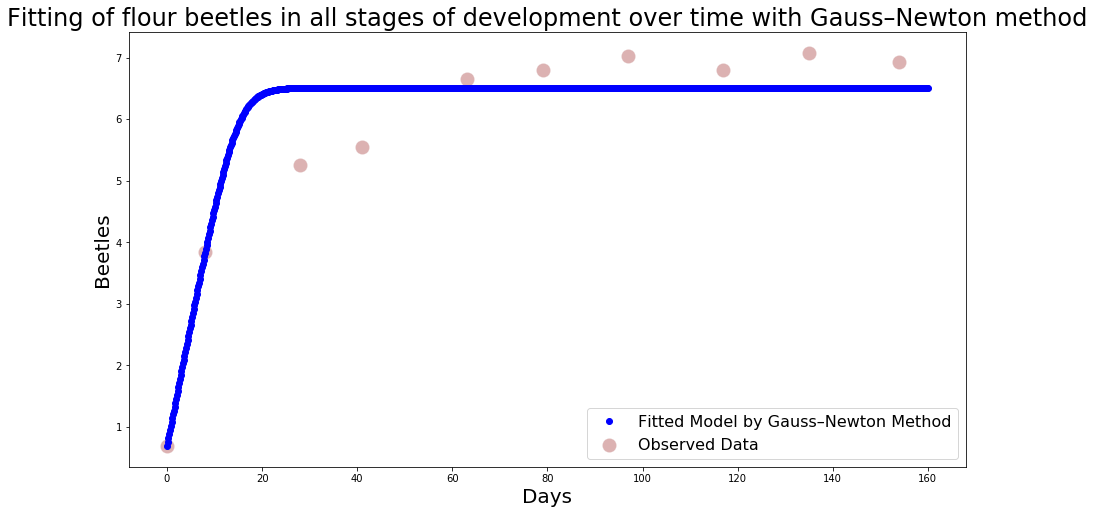

In [47]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=Data,x='Days',y='log(N_t)',color="darkred",alpha=0.3,s=200)
plt.title("Fitting of flour beetles in all stages of development over time with Gauss‚ÄìNewton method",fontsize=24)
plt.plot(t_plot, y1, 'bo')
plt.legend(("Fitted Model by Gauss‚ÄìNewton Method", "Observed Data"),fontsize=16)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Beetles',fontsize=20)

## Newton-Raphson

In [48]:
t = Symbol('t')
K = Symbol('K')
r = Symbol('r')
logf = log(K)+log(2)-log(2+(K-2)*sym.exp(-r*t))
logft=lambdify([t,K,r], logf, 'numpy')

In [49]:
logf_prime_r = logf.diff(r)
logf_doubleprime_r=logf_prime_r.diff(r)
logf_firstder_r=lambdify([t,K,r], logf_prime_r, 'numpy')
logf_secder_r=lambdify([t,K,r], logf_doubleprime_r, 'numpy')

In [50]:
logf_prime_r

t*(K - 2)*exp(-r*t)/((K - 2)*exp(-r*t) + 2)

In [51]:
logf_prime_K = logf.diff(K)
logf_doubleprime_K=logf_prime_K.diff(K)
logf_firstder_K=lambdify([t,K,r], logf_prime_K, 'numpy')
logf_secder_K=lambdify([t,K,r], logf_doubleprime_K, 'numpy')

In [52]:
logf_prime_K

-exp(-r*t)/((K - 2)*exp(-r*t) + 2) + 1/K

In [53]:
logf_doubleprime_Kr=logf_prime_K.diff(r)
logf_secder_Kr=lambdify([t,K,r], logf_doubleprime_Kr, 'numpy')

In [54]:
def g(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=(y[i]-logft(t[i],K,r))**2
    return g

In [55]:
def gprime_r(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-logft(t[i],K,r))*logf_firstder_r(t[i],K,r)
    return g    

In [56]:
def gprime_K(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-logft(t[i],K,r))*logf_firstder_K(t[i],K,r)
    return g    

In [57]:
def gdoubleprime_r(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-logft(t[i],K,r))*logf_secder_r(t[i],K,r)+2*((logf_firstder_r(t[i],K,r))**2)
    return g    

In [58]:
def gdoubleprime_K(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-logft(t[i],K,r))*logf_secder_K(t[i],K,r)+2*((logf_firstder_K(t[i],K,r))**2)
    return g    

In [59]:
def gdoubleprime_Kr(y,t,K,r):
    g=0
    for i in range (0,len(t)):
        g+=-2*(y[i]-logft(t[i],K,r))*logf_secder_Kr(t[i],K,r)+2*logf_firstder_K(t[i],K,r)*logf_firstder_r(t[i],K,r)
    return g    

In [60]:
result_NRlog,K_NRlog,r_NRlog=Newton_Rapson(Data['log(N_t)'],Data['Days'],200,0.5,0.001,1000)

|   iteration | K and r          | Hessian Matrix                    |    SE_K |      SE_r |   Correlation |
|-------------+------------------+-----------------------------------+---------+-----------+---------------|
|           0 | [[313.7338036 ]  | [[2.87748778e-04 5.60333178e-03]  | 58.9828 | 0.0989909 |    -0.0326816 |
|             |  [  0.32481905]] |  [5.60333178e-03 1.02158286e+02]] |         |           |               |
|   iteration | K and r            | Hessian Matrix                    |    SE_K |     SE_r |   Correlation |
|-------------+--------------------+-----------------------------------+---------+----------+---------------|
|           1 | [[4.48557561e+02]  | [[1.11675981e-04 3.68616179e-03]  | 94.6858 | 0.100116 |    -0.0349006 |
|             |  [4.04443868e-01]] |  [3.68616179e-03 9.98904859e+01]] |         |          |               |
|   iteration | K and r            | Hessian Matrix                    |    SE_K |      SE_r |   Correlation |
|------------

The final $k$ and $r$ are:

In [61]:
print ('The optimum is at: K=', K_NRlog,'r=',r_NRlog)

The optimum is at: K= 672.0907891427541 r= 0.40046090005088


The last 5 iterations for Gauss_Newton method is:

In [62]:
result_NRlog.tail(10)

K         r Residual  Hessian first col.  Hessian second col.  \
1992  672.091  0.400461  3.43244            0.000035             0.002271   
1993      nan       nan      nan            0.002271           102.425202   
1994  672.091  0.400461  3.43244            0.000035             0.002271   
1995      nan       nan      nan            0.002271           102.425202   
1996  672.091  0.400461  3.43244            0.000035             0.002271   
1997      nan       nan      nan            0.002271           102.425202   
1998  672.091  0.400461  3.43244            0.000035             0.002271   
1999      nan       nan      nan            0.002271           102.425202   
2000  672.091  0.400461  3.43244            0.000035             0.002271   
2001      nan       nan      nan            0.002271           102.425202   

         SE_K       SE_r Correlation  
1992  168.238  0.0988794  -0.0377286  
1993      nan        nan         nan  
1994  168.238  0.0988794  -0.0377286  
1995      nan        nan         nan  
1996  168.238  0.0988794  -0.0377286  
1997      nan        nan         nan  
1998  168.238  0.0988794  -0.0377286  
1999      nan        nan         nan  
2000  168.238  0.0988794  -0.0377286  
2001      nan        nan         nan

Now, we can plot the Ô¨Åtted model together with the observed data in a single plot.

Text(0, 0.5, 'Beetles')

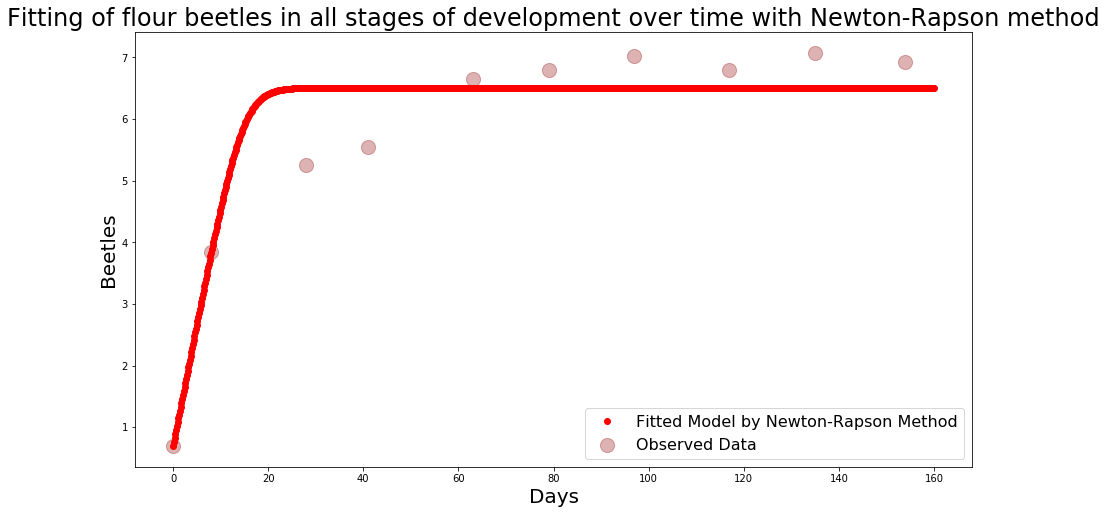

In [63]:
plt.figure(figsize=(15,8))
plt.scatter(data=Data,x='Days',y='log(N_t)',color="darkred",alpha=0.3,s=200)
plt.title("Fitting of flour beetles in all stages of development over time with Newton-Rapson method",fontsize=24)
plt.plot(t_plot, logft(t_plot,672.0907891427541, 0.40046090005088), 'ro')
plt.legend(("Fitted Model by Newton-Rapson Method", "Observed Data"),fontsize=16)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Beetles',fontsize=20)

## Last part of question: Provide standard errors for your parameter estimates, and an estimate of the correlation between them. Comment.

To find the standard error, first we need to find covariance matrix:

In $\textbf{Gauss-Newton}$ method:

\begin{equation*}
Covariance\ matrix=[A^T  A]^{-1}
\end{equation*}

In $\textbf{Newton-Raphson}$ method covariance matrix can be find from inverse of Fisher matrix. An estimation of Fisher matrix is Hessain matrix.

\begin{equation*}
I(K,r) (Fisher matrix)=-H(K,r) (Hessian matrix)
\end{equation*}

\begin{equation*}
Covariance\ matrix=[I(K,r)]^{-1}
\end{equation*}

The diagonal of covariance matrix is variance of each parameter. This can be a good estimation for standard error of parameters. 

Correlation between $K$ and $r$ can be find from following equation:

\begin{equation*}
Correlation=\frac{covariance(K,r)}{\sqrt{varance(K)}\sqrt{varance(r)}}
\end{equation*}

According to result, when we use normal distribution, the standard error and $K$ is more than $r$. The correlation between $K$ and $r$ is around 0.03 which shows they are uncorrelative. 

# 2. Reproduce the solution to Example 4.2. That is, present the output of your code in the format of Table 4.1.


According to Example 4.2, We Suppose the observed phenotype counts are $n_C =85$, $n_I =196$, and $n_T =341$. Also we consider initial values for n and p:

In [64]:
x = np.array([85, 196, 341])
n = np.zeros(6)
p = np.repeat((1/3), 3)

First we need to do E-step. Therefore, we need to write the Expectation Function:

In [65]:
def Expectation(x, p):
    cc = (x[0]*(p[0]**2))/((p[0]**2)+2*p[0]*p[1]+2*p[0]*p[2])
    ci = (2*x[0]*p[0]*p[1])/((p[0]**2)+2*p[0]*p[1]+2*p[0]*p[2])
    ct = (2*x[0]*p[0]*p[2])/((p[0]**2)+2*p[0]*p[1]+2*p[0]*p[2])
    ii = (x[1]*(p[1]**2))/((p[1]**2)+2*p[1]*p[2])
    it = (2*x[1]*p[1]*p[2])/((p[1]**2)+2*p[1]*p[2])
    n = np.array([cc, ci, ct, ii, it, x[2]])
    return n

Second we need to do M-step. Therefore, we need to write the Maximization Function:

In [66]:
def Maximization(x, n):
    c = (2*n[0]+n[1]+n[2])/(2*sum(x))
    i = (2*n[3]+n[4]+n[1])/(2*sum(x))
    t = (2*n[5]+n[2]+n[4])/(2*sum(x))
    p = np.array([c, i, t])
    return p

Now, we can define the EM function:

In [67]:
def EM(x,p,e,maxiter):
    pc_arrey = []
    pi_arrey = []
    for i in range(maxiter):
        p0 = p
        pc_arrey.append(p0[0])
        pi_arrey.append(p0[1])
        if i == 0:
            print(tabulate([[i, p0[0], p0[1], 0, 0, 0]],headers = ['t', 'Pc(t)', 'Pi(t)', 'R(t)', 'Dc(t)', 'Di(t)'],tablefmt='orgtbl'))        
       
        n = Expectation(x,p)
        p = Maximization(x,n)
        R = LA.norm((p[0:2] - p0[0:2]), 2) / LA.norm(p0[0:2], 2)
        Dc = (p[0] - 0.0708369) / (p0[0] - 0.0708369)
        Di = (p[1] - 0.188737) / (p0[1] - 0.188737)
        print(tabulate([[i+1, p[0], p[1], R, Dc, Di]],headers = ['t', 'Pc(t)', 'Pi(t)', 'R(t)', 'Dc(t)', 'Di(t)'],tablefmt='orgtbl'))

        if R < e:
            break;


In [68]:
EM(x,p,0.000001,60)

|   t |    Pc(t) |    Pi(t) |   R(t) |   Dc(t) |   Di(t) |
|-----+----------+----------+--------+---------+---------|
|   0 | 0.333333 | 0.333333 |      0 |       0 |       0 |
|   t |     Pc(t) |    Pi(t) |     R(t) |     Dc(t) |    Di(t) |
|-----+-----------+----------+----------+-----------+----------|
|   1 | 0.0819936 | 0.237406 | 0.570685 | 0.0425022 | 0.336587 |
|   t |    Pc(t) |   Pi(t) |     R(t) |     Dc(t) |    Di(t) |
|-----+----------+---------+----------+-----------+----------|
|   2 | 0.071249 | 0.19787 | 0.163121 | 0.0369333 | 0.187647 |
|   t |    Pc(t) |   Pi(t) |     R(t) |     Dc(t) |    Di(t) |
|-----+----------+---------+----------+-----------+----------|
|   3 | 0.070852 | 0.19036 | 0.035756 | 0.0367456 | 0.177756 |
|   t |     Pc(t) |    Pi(t) |       R(t) |     Dc(t) |    Di(t) |
|-----+-----------+----------+------------+-----------+----------|
|   4 | 0.0708375 | 0.189023 | 0.00658604 | 0.0372312 | 0.175997 |
|   t |     Pc(t) |    Pi(t) |       R(t) |     D